In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Load cleaned data
coverage = pd.read_csv("../data/cleaned_coverage_data.csv")
incidence = pd.read_csv("../data/cleaned_incidence_rate_data.csv")
reported = pd.read_csv("../data/cleaned_reported_cases_data.csv")
vaccine_intro = pd.read_csv("../data/cleaned_vaccine_introduction_data.csv")
schedule = pd.read_csv("../data/cleaned_vaccine_schedule_data.csv")

In [13]:
# Display basic info
print("Coverage Data Overview:")
print(coverage.info())
print(coverage.describe())

Coverage Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399859 entries, 0 to 399858
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   GROUP_NAME                     399859 non-null  object 
 1   CODE                           399858 non-null  object 
 2   NAME                           398584 non-null  object 
 3   YEAR                           399858 non-null  float64
 4   ANTIGEN                        399858 non-null  object 
 5   ANTIGEN_DESCRIPTION            399858 non-null  object 
 6   COVERAGE_CATEGORY              399858 non-null  object 
 7   COVERAGE_CATEGORY_DESCRIPTION  399858 non-null  object 
 8   TARGET_NUMBER                  79030 non-null   float64
 9   DOSES                          79327 non-null   float64
 10  COVERAGE                       230477 non-null  float64
dtypes: float64(4), object(7)
memory usage: 33.6+ MB
None
              

In [14]:
print("\nNull values in Coverage Data:\n", coverage.isnull().sum())


Null values in Coverage Data:
 GROUP_NAME                            0
CODE                                  1
NAME                               1275
YEAR                                  1
ANTIGEN                               1
ANTIGEN_DESCRIPTION                   1
COVERAGE_CATEGORY                     1
COVERAGE_CATEGORY_DESCRIPTION         1
TARGET_NUMBER                    320829
DOSES                            320532
COVERAGE                         169382
dtype: int64


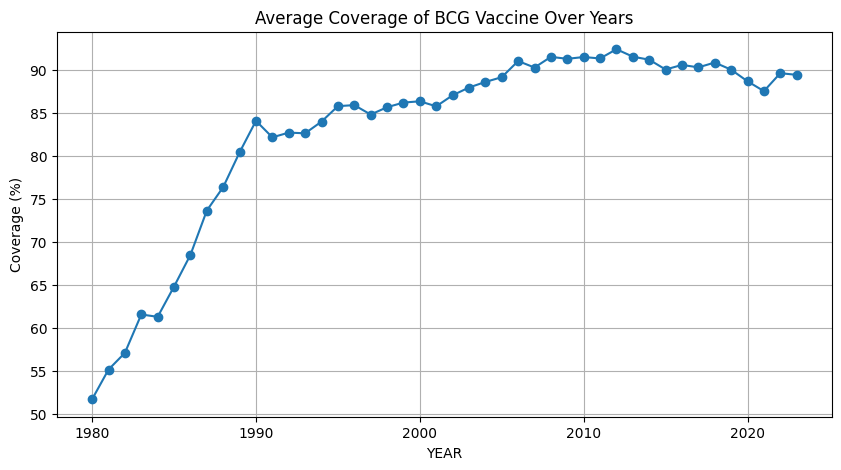

In [15]:
# Plot 1: Vaccination coverage over years (for a common vaccine)
plt.figure(figsize=(10,5))
sample_vaccine = "BCG"  # change as needed
vc = coverage[coverage["ANTIGEN"] == sample_vaccine]
vc.groupby("YEAR")["COVERAGE"].mean().plot(marker='o')
plt.title(f"Average Coverage of {sample_vaccine} Vaccine Over Years")
plt.ylabel("Coverage (%)")
plt.grid(True)
plt.savefig("../visuals/vaccine_coverage.png")
plt.show()

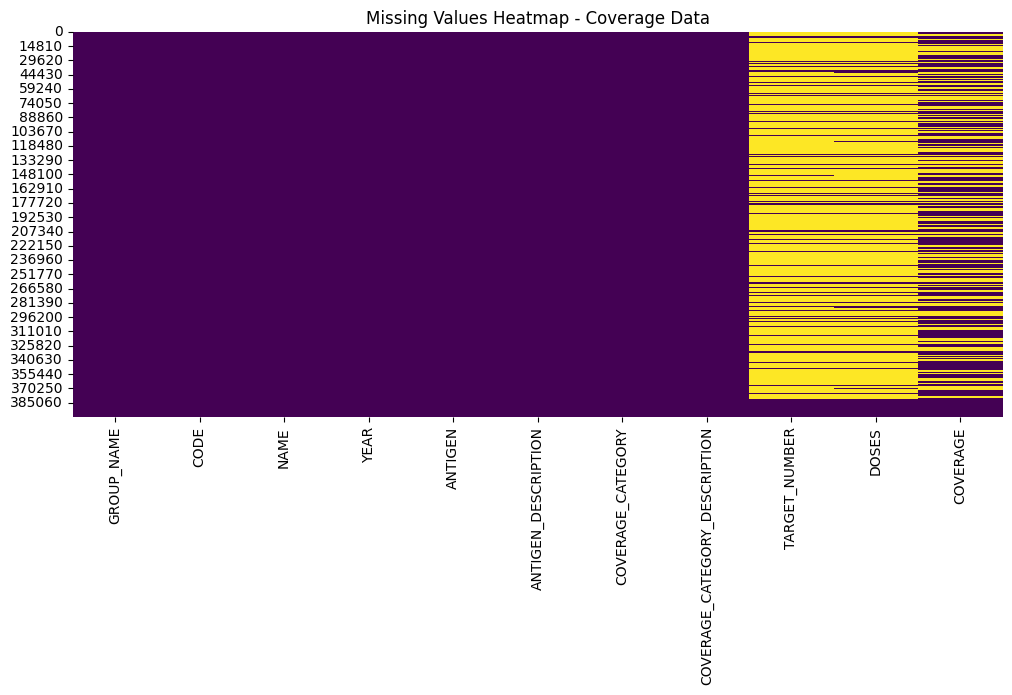

In [16]:
# Plot 2: Heatmap of nulls (useful for all datasets)
plt.figure(figsize=(12,5))
sns.heatmap(coverage.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap - Coverage Data")
plt.savefig("../visuals/nulls.png")
plt.show()

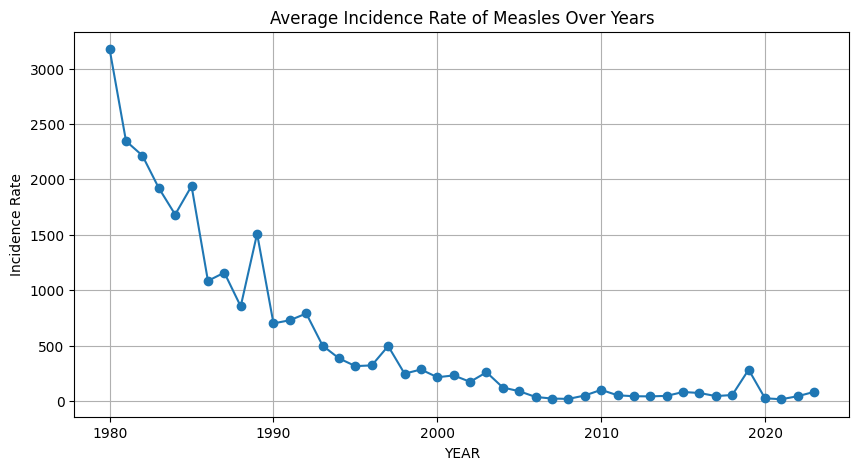

In [17]:
# Average incidence rate over years for a sample disease (e.g., Measles)
sample_disease = "Measles"
df = incidence[incidence["DISEASE_DESCRIPTION"].str.contains(sample_disease, case=False, na=False)]

plt.figure(figsize=(10, 5))
df.groupby("YEAR")["INCIDENCE_RATE"].mean().plot(marker='o')
plt.title(f"Average Incidence Rate of {sample_disease} Over Years")
plt.ylabel("Incidence Rate")
plt.grid(True)
plt.savefig("../visuals/Averageincidence_measels.png")
plt.show()

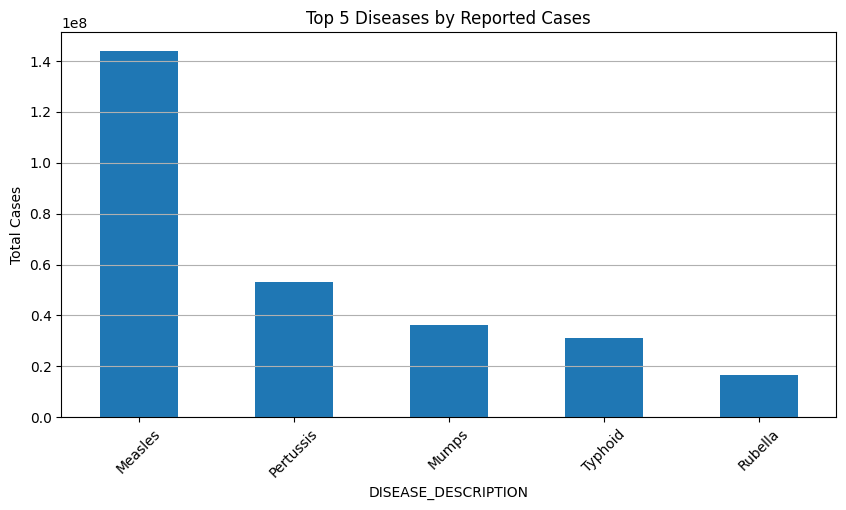

In [18]:
# Top 5 diseases by total reported cases
top_diseases = reported.groupby("DISEASE_DESCRIPTION")["CASES"].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 5))
top_diseases.plot(kind='bar')
plt.title("Top 5 Diseases by Reported Cases")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.savefig("../visuals/vaccine_coverage.png")
plt.show()

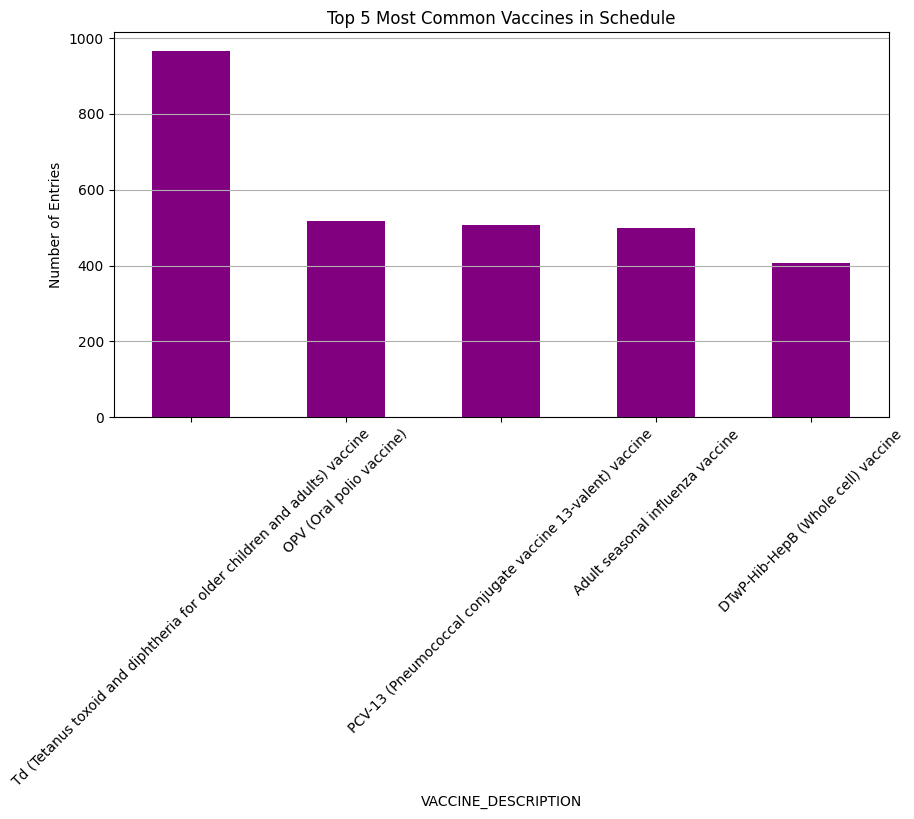

In [19]:
# Most common vaccines in the schedule
top_vaccines = schedule["VACCINE_DESCRIPTION"].value_counts().head(5)

plt.figure(figsize=(10, 5))
top_vaccines.plot(kind='bar', color='purple')
plt.title("Top 5 Most Common Vaccines in Schedule")
plt.ylabel("Number of Entries")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.savefig("../visuals/top_vaccines_schedule.png")
plt.show()


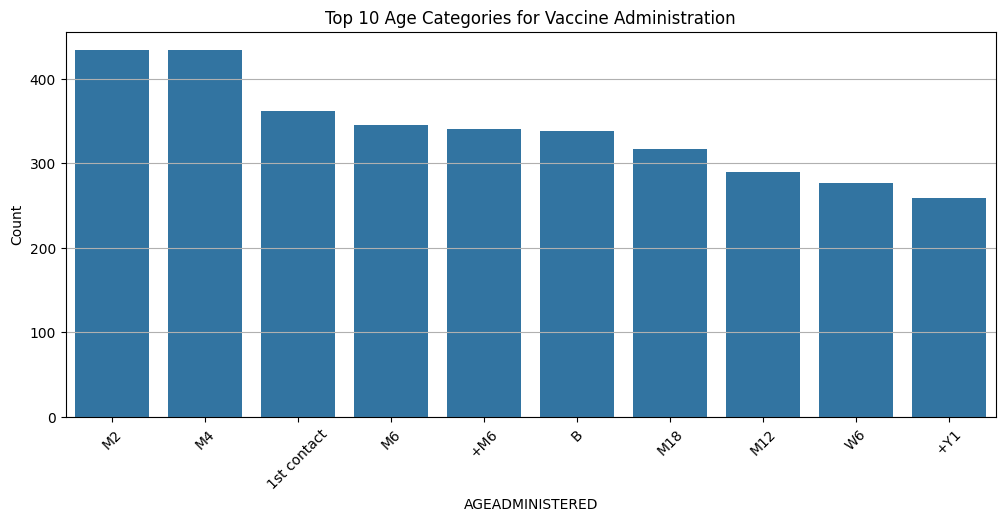

In [20]:
# Age distribution of vaccine administration
plt.figure(figsize=(12, 5))
sns.countplot(data=schedule, x="AGEADMINISTERED", order=schedule["AGEADMINISTERED"].value_counts().index[:10])
plt.title("Top 10 Age Categories for Vaccine Administration")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.grid(axis='y')
plt.savefig("../visuals/age_distribution_vaccines.png")
plt.show()
